# Linear Regression

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading Data, Extracting 3 Columns and Cleaning Them

In [2]:
#Loading Data
data = pd.read_csv("turboaz.csv")

In [3]:
data

,Sheher,Marka,Model,Buraxilish ili,Ban novu,Reng,Muherrikin hecmi,Muherrikin gucu,Yanacaq novu,Yurush,Suretler qutusu,Oturucu,Yeni,Qiymet,Extra Info,Seller comment
0,Sumqayıt,Mercedes,C 200,1999,Sedan,Qara,2.0 L,175 a.g.,Benzin,366 000 km,Avtomat,Arxa,Xeyr,12500 AZN,Kreditdədir,Barter mümkündür
1,Bakı,Mercedes,C 180,2014,Sedan,Qara,1.6 L,167 a.g.,Benzin,102 000 km,Avtomat,Arxa,Xeyr,31500 $,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."
2,Sumqayıt,Mercedes,C 240,2002,Sedan,Qara,2.6 L,177 a.g.,Benzin,469 700 km,Avtomat,Arxa,Xeyr,11700 AZN,Kreditdədir,Barter mümkündür
3,Şirvan,Mercedes,C 180,1998,Sedan,Göy,1.8 L,125 a.g.,Benzin,556 680 km,Avtomat,Arxa,Xeyr,9700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Mawin BAKIDADI. Tecili satilir yaxwi veziyetde...
4,Sumqayıt,Mercedes,C 220,2000,Sedan,Gümüşü,2.2 L,150 a.g.,Dizel,300 000 km,Avtomat,Arxa,Xeyr,12700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Par...",Vurugu udari deyisen detali curuyu qetiyyen yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Bakı,Mercedes,C 180,1996,Sedan,Boz,1.8 L,122 a.g.,Benzin,325 000 km,Avtomat,Arxa,Xeyr,8800 AZN,"Yüngül lehimli disklər,Lyuk",Mawin ozumundu 10ildi mendedi udar gormeyib vu...
1324,Sumqayıt,Mercedes,C 180,1994,Sedan,Bənövşəyi,1.8 L,122 a.g.,Benzin,280 000 km,Avtomat,Arxa,Xeyr,6300 AZN,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Normal maşindi ...otur sūr..problemi yoxdu..öz...
1325,Bakı,Mercedes,C 230,1998,Sedan,Ağ,2.3 L,150 a.g.,Benzin,272 000 km,Avtomat,Arxa,Xeyr,10900 AZN,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",MASHIN TECILI SATILIR!! Mashin tam saz veziyet...
1326,Qusar,Mercedes,C 240,2000,Sedan,Gümüşü,2.4 L,170 a.g.,Benzin,207 000 km,Avtomat,Arxa,Xeyr,11300 AZN,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."


In [4]:
#Extracting 3 columns
data = data[["Yurush", "Buraxilish ili", "Qiymet"]]

In [5]:
data

,Yurush,Buraxilish ili,Qiymet
0,366 000 km,1999,12500 AZN
1,102 000 km,2014,31500 $
2,469 700 km,2002,11700 AZN
3,556 680 km,1998,9700 AZN
4,300 000 km,2000,12700 AZN
...,...,...,...
1323,325 000 km,1996,8800 AZN
1324,280 000 km,1994,6300 AZN
1325,272 000 km,1998,10900 AZN
1326,207 000 km,2000,11300 AZN


In [6]:
#Creating Function for cleaning "Yurush" column
def CleanYurush(yurush):
    yurush = re.sub(r" km", "", yurush)
    yurush = re.sub(r" ", "", yurush)
    yurush = int(yurush)
    return yurush

In [7]:
#Cleaning "Yurush" column
data['Yurush'] = data['Yurush'].apply(lambda yurush: CleanYurush(yurush))

<ipython-input-7-1042f10b4c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yurush'] = data['Yurush'].apply(lambda yurush: CleanYurush(yurush))


In [8]:
data

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500 AZN
1,102000,2014,31500 $
2,469700,2002,11700 AZN
3,556680,1998,9700 AZN
4,300000,2000,12700 AZN
...,...,...,...
1323,325000,1996,8800 AZN
1324,280000,1994,6300 AZN
1325,272000,1998,10900 AZN
1326,207000,2000,11300 AZN


In [9]:
#Creating Function for cleaning "Qiymet" column
def CleanQiymet(qiymet):
    if qiymet[len(qiymet) - 1] == "$":
        qiymet = re.sub(r" \$", "", qiymet)
        qiymet = re.sub(r" ", "", qiymet)
        qiymet = int(int(qiymet)*1.70)
    elif qiymet[len(qiymet) - 3:] == "AZN":
        qiymet = re.sub(r" AZN", "", qiymet)
        qiymet = re.sub(r" ", "", qiymet)
        qiymet = int(qiymet)
    else:
        qiymet = re.sub(r" ", "", qiymet)
        qiymet = int(qiymet)
    return qiymet

In [10]:
#Cleaning "Qiymet" column
data['Qiymet'] = data['Qiymet'].apply(lambda qiymet: CleanQiymet(qiymet))

<ipython-input-10-536be1ae1682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Qiymet'] = data['Qiymet'].apply(lambda qiymet: CleanQiymet(qiymet))


In [11]:
data

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500
1,102000,2014,53550
2,469700,2002,11700
3,556680,1998,9700
4,300000,2000,12700
...,...,...,...
1323,325000,1996,8800
1324,280000,1994,6300
1325,272000,1998,10900
1326,207000,2000,11300


## Vizualization Part 1

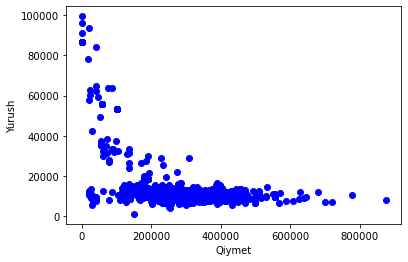

In [12]:
#Vizualizing "Yurush" and "Qiymet"
plt.scatter(data["Yurush"], data["Qiymet"], c = 'b')
plt.xlabel("Qiymet")
plt.ylabel("Yurush")
plt.show()

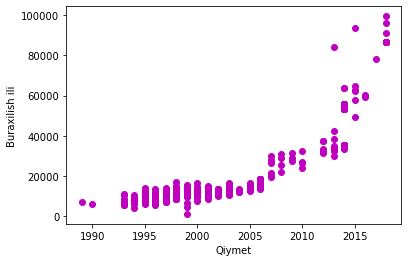

In [13]:
#Vizualizing "Buraxilish ili" and "Qiymet"
plt.scatter(data["Buraxilish ili"], data["Qiymet"], c = 'm')
plt.xlabel("Qiymet")
plt.ylabel("Buraxilish ili")
plt.show()

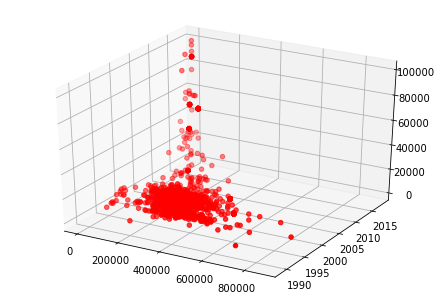

In [14]:
#Vizualazing 3D plot of all 3 Column Values, "Yurush", "Buraxilish ili", "Qiymet"
figure = plt.figure()
threeD = Axes3D(figure)
threeD.scatter(data["Yurush"], data["Buraxilish ili"], data["Qiymet"], color = 'r')
plt.show()

## Multiple Linear Regression from Scratch

In [15]:
#Selecting input and output columns
x = data.values[:, 0:2]  #getting input values from first two columns
y = data.values[:, 2]  #getting output values from last coulmn
m = len(y) #Number of training examples

print("Total no of training examples m = %s \n" %(m))

#Showing first 5 records to see how the input and output columns look like
for i in range(5):
    print('x =', x[i], ', y =', y[i])

Total no of training examples m = 1328 

x = [366000   1999] , y = 12500
x = [102000   2014] , y = 53550
x = [469700   2002] , y = 11700
x = [556680   1998] , y = 9700
x = [300000   2000] , y = 12700


## Feature Normalization

We start by loading and displaying some values from this dataset. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to create the code called `FeatureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, we can use the `std` function to compute the standard deviation. 

For example, the quantity `x[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `FeatureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $x$. Or, we can make this call before adding column of ones to our input data in order to avoid array slicing in the function generation as shown below code.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of cars we have not seen before. Given a new x value, we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>

In [16]:
#Normalizing the input data
def FeatureNormalize(x):
    mu = np.mean(x, axis = 0) #Finding average of each input columns  
    sigma = np.std(x, axis = 0, ddof = 1) #Standard deviation (can also use range) ddof (Delta Degrees of Freedom) value is 1
    x_norm = (x - mu)/sigma
    return x_norm, mu, sigma

In [17]:
#Appliying the function to the input data
x, mu, sigma = FeatureNormalize(x) #Here, update x (input columns), so we normalize it

#Printing the results of the function
print('mu = ', mu)
print('sigma = ', sigma)
print('x_norm = ', x[:5])

mu=  [279649.92168675   1999.86596386]
sigma=  [1.20619608e+05 5.32954269e+00]
x_norm=  [[ 0.71588757 -0.16248371]
 [-1.4728113   2.65201669]
 [ 1.57561512  0.40041637]
 [ 2.29672508 -0.35011707]
 [ 0.16871285  0.02514965]]


In [18]:
#Testing mean of already normalized input data
mu_testing = np.mean(x, axis = 0)
mu_testing

array([-5.35047241e-17, -2.05685536e-14])

In [19]:
#Testing standard deviation of already normalized input data
sigma_testing = np.std(x, axis = 0, ddof = 1)
sigma_testing

array([1., 1.])

In [20]:
#Using hstack() function from numpy to add column of ones to x feature (input datas). It is because of theta[0] value in the
#hypothesis. It should not change in summation operation because usually theta[0] refers to initial value of something such as 
#the initial price of the car is theta[0] and we add other thetas multiply with other features to predict final price. So, this
#will be our final x matrix (feature matrix)
x = np.hstack((np.ones((m, 1)), x))
x[:5]

array([[ 1.        ,  0.71588757, -0.16248371],
       [ 1.        , -1.4728113 ,  2.65201669],
       [ 1.        ,  1.57561512,  0.40041637],
       [ 1.        ,  2.29672508, -0.35011707],
       [ 1.        ,  0.16871285,  0.02514965]])

In [21]:
y[:5]

array([12500, 53550, 11700,  9700, 12700], dtype=int64)

<a id="section2"></a>
## Gradient Descent and Cost Function

In this part, we create Gradient Descent function to fit the linear regression parameters $\theta$ to our dataset using gradient descent.

### Updated Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of our model are the $\theta_j$ values. These are
the values we will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, our parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

## Gradient Descent and Cost Function Implementation from Scratch

In [22]:
#Creating Cost Function
def ComputeCost(x, y, theta):
    predictions = np.dot(x, theta) #Making prediction using linear regression hypothesis. It is used in Grad. Desc. and Cost Function
    errors = np.subtract(predictions, y) #Calculating the errors based on predictions and actual values(y)
    sqrErrors = np.square(errors) #Squaring errors for cost function formula
    #J = 1 / (2 * m) * np.sum(sqrErrors)
    #OR
    #We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
    J = 1/(2 * m) * np.dot(errors.T, errors)
    return J

In [23]:
#Function for Gradient Descent (Batch Gradient Descent because we replaced derivative part with cost function formula and already simplified)
def GradientDescent(x, y, theta, alpha, iterations):
    CostHistory = np.zeros(iterations) #An array to store values of cost function in each iteration. We do not create an ordinary list and append costs becase it should be an numpy array for such tasks
    for i in range(iterations):
        predictions = np.dot(x, theta) #Making prediction using linear regression hypothesis. It is used in Grad. Desc. and Cost Function
        errors = np.subtract(predictions, y) #Calculating the errors based on predictions and actual values(y)
        sum_delta = (alpha / m) * x.T.dot(errors) #
        theta = theta - sum_delta;
        CostHistory[i] = ComputeCost(x, y, theta) #Changing values of CostHistory array to store the values of cost function
    return theta, CostHistory

In [24]:
#Defining some inputs for the above function to find suitable values for theta
#We need theta parameter for every input variable. since we have three input variable including x_0 (column of ones)
#The reason for making all thetas 0 is that in the formula, we multiply it with the normalized values of x (input datas) 
#so they are low enough and making all thetas initially 0 makes thetas high enough and gives logical values 
#when multiplying by x values (input datas)
theta = np.zeros(3)
iterations = 10000
#Learning Rate
alpha = 0.001

In [25]:
#Finally, starting to function the GradientDescent function which is related with ComputeCost function, too in order to find 
#optimal values for thetas and observe the decreasing of cost function values from CostHistory array
MainThetas, CostHistory = GradientDescent(x, y, theta, alpha, iterations)
print('Final value of Thetas = ', MainThetas)
print('First 5 values from CostHistory = ', CostHistory[:5])
print('Last 5 values from CostHistory = ', CostHistory[-5 :])

Final value of Thetas = [15115.76894652 -1343.01958704 11272.83889767]
First 5 values from CostHistory = [2.06916608e+08 2.06484117e+08 2.06052703e+08 2.05622362e+08
 2.05193090e+08]
Last 5 values from CostHistory = [19779981.71854855 19779979.96711231 19779978.21717945 19779976.46874867
 19779974.72181866]


In [26]:
#Our Linear Regression hypothesis. We use it after running all above codes and defining most suitable values for thetas
def hypothesis(x, theta):
    NormalizingInputData = ((x - mu)/sigma)
    AddingOnes = np.hstack((np.ones((len(x), 1)), NormalizingInputData))
    price = AddingOnes.dot(theta)
    return price

## Testing

In [27]:
#Testing with "Yurush" 240000 and "Buraxilish ili" 2000
hypothesis(np.array([[240000, 2000]]), MainThetas) #Actual Qiymet is 11500

array([15840.75258635])

In [28]:
#Testing with "Yurush" 240000 and "Buraxilish ili" 2000
hypothesis(np.array([[415558, 1996]]), MainThetas) #Actual Qiymet is 8800

array([5425.38779086])

In [29]:
#Creating a DataFrame for comparing actual and predicted values
ComparisonData = pd.DataFrame({'Actual': y, 'Predicted': hypothesis(data.values[:, 0:2], MainThetas)})

In [30]:
ComparisonData

,Actual,Predicted
0,12500,12322.665258
1,53550,46989.540224
2,11700,17513.516222
3,9700,8084.408892
4,12700,15172.692256
...,...,...
1323,8800,6433.691248
1324,6300,2704.415228
1325,10900,11254.132475
1326,11300,16208.185768


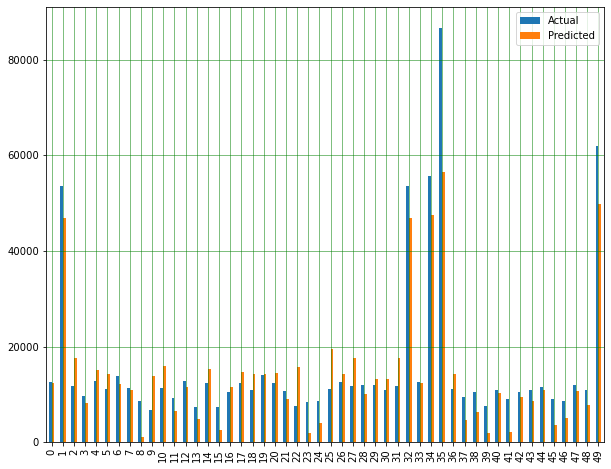

In [31]:
#Comparing the Actual and Predicted values using bar plot for the first 50 values (for better view due to lots of data)
ComparisonData[:50].plot(kind = 'bar',figsize = (10, 8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

## Vizualization Part 2

Text(0.5, 1.0, 'Convergence of gradient descent')

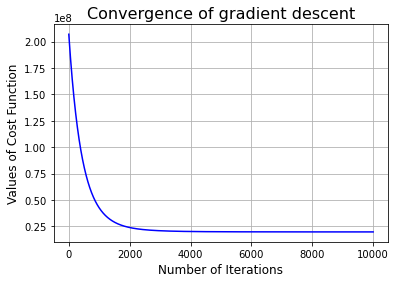

In [32]:
#Vizualizing CostHistory and Number of Iterations in order to show that Cost Function values decreases in each iteration
plt.plot(range(1, iterations + 1), CostHistory, color = 'blue')
plt.grid()
plt.xlabel("Number of Iterations", fontsize = 12)
plt.ylabel("Values of Cost Function", fontsize = 12)
plt.title("Convergence of gradient descent", fontsize = 16)

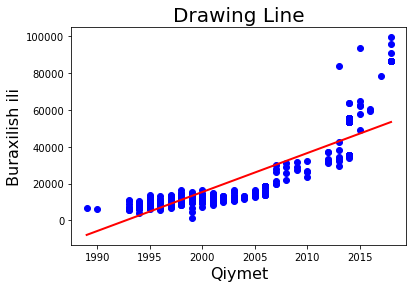

In [33]:
#Vizualizing "Buraxilish ili" and "Qiymet" by scatter plot, and drawing line based on predicted values from the model

#Scatter Plotting "Buraxilish ili" and "Qiymet" columns from actual data
plt.scatter(data["Buraxilish ili"], data["Qiymet"], c = 'b')

#Defining x and y values. y is the minimum and maximum values of "Buraxilish ili" column, x is the prediction 
#based on created model. mu, sigma, and and theta values are selected corresponding to index of "Buraxilish ili" column
a = [data["Buraxilish ili"].min(), data["Buraxilish ili"].max()]
a_min = MainThetas[0] + ((data["Buraxilish ili"].min() - mu[1])/sigma[1])*MainThetas[2]
b_max = MainThetas[0] + ((data["Buraxilish ili"].max() - mu[1])/sigma[1])*MainThetas[2]
b = [a_min, b_max]

#Plotting (drawing line) based on above x and y values
plt.plot(a, b, linewidth = 2, c = "r")
plt.xlabel("Qiymet", fontsize = 16)
plt.ylabel("Buraxilish ili", fontsize = 16)
plt.title("Drawing Line", fontsize = 20)
plt.show()

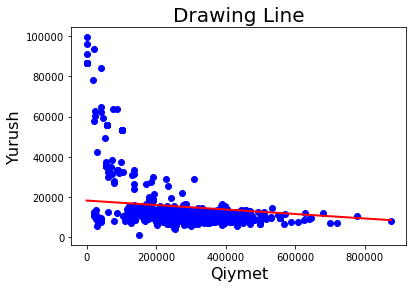

In [34]:
#Vizualizing "Yurush" and "Qiymet" by scatter plot, and drawing line based on predicted values from the model
#Scatter Plotting "Buraxilish ili" and "Qiymet" columns from actual data
plt.scatter(data["Yurush"], data["Qiymet"], c = 'b')

#Defining x and y values. y is the minimum and maximum values of "Yurush" column, x is the prediction 
#based on created model. mu, sigma, and and theta values are selected corresponding to index of "Yurush" column
a = [data["Yurush"].min(), data["Yurush"].max()]
a_min = MainThetas[0] + ((data["Yurush"].min() - mu[0])/sigma[0])*MainThetas[1]
b_max = MainThetas[0] + ((data["Yurush"].max() - mu[0])/sigma[0])*MainThetas[1]
b = [a_min, b_max]

#Plotting (drawing line) based on above x and y values
plt.plot(a, b, linewidth = 2, c = "r")
plt.xlabel("Qiymet", fontsize = 16)
plt.ylabel("Yurush", fontsize = 16)
plt.title("Drawing Line", fontsize = 20)
plt.show()

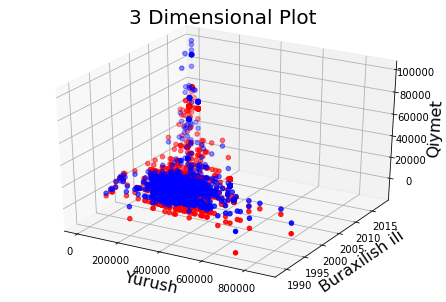

In [35]:
#Vizualazing 3D plot of all 3 Column Values, "Yurush", "Buraxilish ili", "Qiymet", 
#and again "Yurush", "Buraxilish ili" and Predicted Values from the model
figure = plt.figure()
threeD = Axes3D(figure)
threeD.scatter(data["Yurush"], data["Buraxilish ili"], data["Qiymet"], color = 'b')
threeD.scatter(data["Yurush"], data["Buraxilish ili"], hypothesis(data.values[:, 0:2], MainThetas), color = 'r')
threeD.set_xlabel("Yurush", fontsize = 16)
threeD.set_ylabel("Buraxilish ili", fontsize = 16)
threeD.set_zlabel("Qiymet", fontsize = 16)
plt.title("3 Dimensional Plot", fontsize = 20)
plt.show()

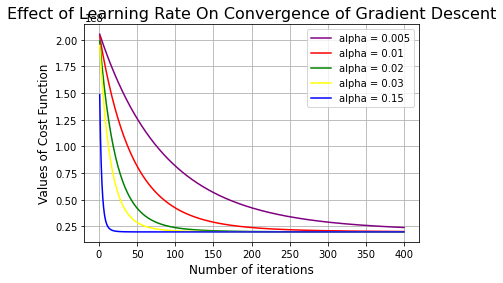

In [36]:
#Assinging different alpha values (learing rates) for the Gradient Descent algorithm to see how it affects 
#the Convergence (Decreasing or Increasing) of cost function values in each iteration

iterations = 400
theta = np.zeros(3)

alpha = 0.005
theta_1, CostHistory1 = GradientDescent(x, y, theta, alpha, iterations)

alpha = 0.01
theta_2, CostHistory2 = GradientDescent(x, y, theta, alpha, iterations)

alpha = 0.02
theta_3, CostHistory3 = GradientDescent(x, y, theta, alpha, iterations)

alpha = 0.03
theta_4, CostHistory4 = GradientDescent(x, y, theta, alpha, iterations)

alpha = 0.15
theta_5, CostHistory5 = GradientDescent(x, y, theta, alpha, iterations)

plt.plot(range(1, iterations + 1), CostHistory1, color = 'purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations + 1), CostHistory2, color = 'red', label = 'alpha = 0.01')
plt.plot(range(1, iterations + 1), CostHistory3, color = 'green', label = 'alpha = 0.02')
plt.plot(range(1, iterations + 1), CostHistory4, color = 'yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations + 1), CostHistory5, color = 'blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel("Number of iterations", fontsize = 12)
plt.ylabel("Values of Cost Function", fontsize = 12)
plt.title("Effect of Learning Rate On Convergence of Gradient Descent", fontsize = 16)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

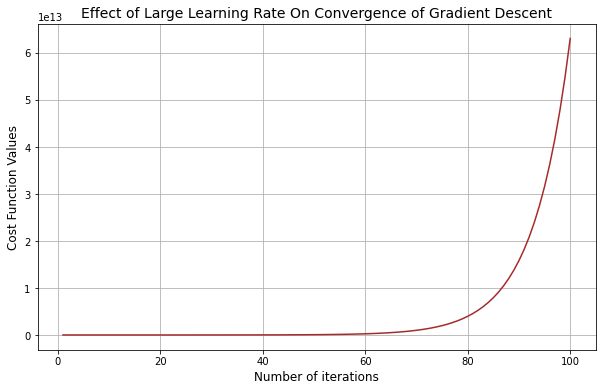

In [37]:
#Here, we make the value of alpha too high to see how it effect the cost function values in each iteration. Expectedly, it
#increases through iteration and we should keep alpha low and fixed beacuse we want cost function values (mean squared error)
#to decrease not increase 

iterations = 100
theta = np.zeros(3)

alpha = 1.32
theta_6, CostHistory6 = GradientDescent(x, y, theta, alpha, iterations)

plt.plot(range(1, iterations + 1), CostHistory6, color = 'brown')
plt.grid()
plt.xlabel("Number of iterations", fontsize = 12)
plt.ylabel("Cost Function Values", fontsize = 12)
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent", fontsize = 14)

## Linear Regression Using Library

In [38]:
#Extracting input and output columns
x = data.values[:, 0:2]
y = data.values[:, 2]
#Spliting input and output datas into train and test part using the library function (train_test_split()))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [39]:
#Initializing the Linear Regression Model
model = LinearRegression()
#Fitting data to the model
model.fit(x_train, y_train)

LinearRegression()

In [40]:
#Printing intercept and coefficient of the model
print("Interception is", model.intercept_)
print("Slope is", model.coef_)

Interception is -4274981.946930431
Slope is [-1.02021687e-02  2.14668384e+03]


In [41]:
#Predicting test values
y_pred = model.predict(x_test)

In [42]:
#Printing Scores of the Model
R2 = metrics.r2_score(y_test, y_pred)
n = x_test.shape[0] #sample size
p = x_test.shape[1] #number of predictors
print("R Squared is:", metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 is:', 1 - (1 - R2)*(n - 1)/(n - p - 1))
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error is:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared is: 0.7465759235907419
Adjusted R^2 is: 0.7446487443024585
Mean Absolute Error is: 4222.383467901494
Mean Squared Error is: 40242454.522250615
Root Mean Squared Error is: 6343.694075398861


In [43]:
#Creating a DataFrame to compare Actual and Predicted values
Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [44]:
Comparison

,Actual,Predicted
0,12500,13423.258988
1,9800,5407.845057
2,12700,15325.090784
3,11250,11444.038265
4,12700,15325.090784
...,...,...
261,9500,4591.671563
262,12500,12505.063807
263,11399,7864.832586
264,9000,7503.518058


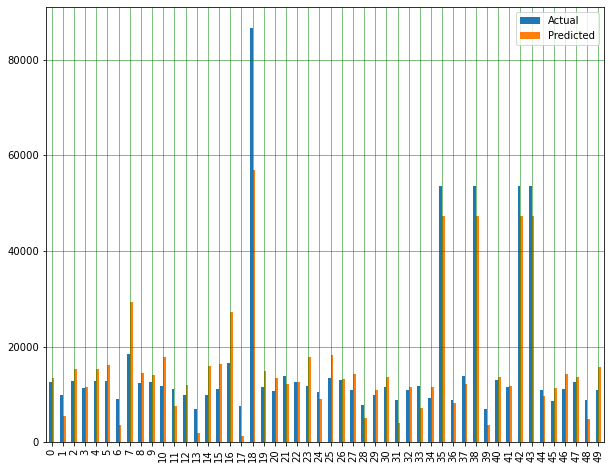

In [45]:
# Comparing the Actual and Predicted values using plot
Comparison[:50].plot(kind = 'bar', figsize = (10, 8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

# Linear Regression with Normal Equation

In this part, we implement the Normal Equation to our dataset in order to find optimal values of thetas using the following formula.

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and we will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will take the data itself from initial form in this script to ensure that the variables have not been modified. Remember that while we do not need to scale our features, we still need to add a column of 1’s to the $x$ matrix to have an intercept term ($\theta_0$).

In [46]:
#Creating Function to apply Normal Equation Formula and making Predictions
def NormalEquationPrediction(x, y):
    m = len(x)
    #Adding ones to hte left of the input data
    x = np.hstack((np.ones((m, 1)), x))
    #Reshaping output data in order to be suitable for multiplication 
    #operations (includes several types (matrix - matrix, matrix - vector etc.))
    y = y.reshape(m, 1)
    #Applying Normal Equation Formula to find optimal values of theta
    theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    #Making Predictions using Linear Regression Hypothesis
    prediction = np.dot(x, theta)
    return prediction

In [47]:
#Predicting Output Values
NormalEquationPrediction(data.values[:, 0:2], data.values[:, 2])

array([[12361.44403771],
       [47071.40443639],
       [17650.22951882],
       ...,
       [11226.34671873],
       [16169.13732762],
       [ 7142.37845148]])

In [48]:
#Creating Comparison DataFrame
#P.S flatten() function is used to make data size suitable for creating DataFrame
Comparison = pd.DataFrame({'Actual': y.flatten(), 'Predicted': NormalEquationPrediction(data.values[:, 0:2], data.values[:, 2]).flatten()})

In [49]:
Comparison

,Actual,Predicted
0,12500,12361.444038
1,53550,47071.404436
2,11700,17650.229519
3,9700,8219.095252
4,12700,15186.720627
...,...,...
1323,8800,6410.319555
1324,6300,2629.527194
1325,10900,11226.346719
1326,11300,16169.137328


# Polynomial Regression

In [50]:
#Here, we are doing Polynomial Regression using built-in Python Library for convenience. For more and very useful information
#press Shift+Tab inside PolynomialFeatures() function.
#Importing a library to define number of features (input columns)
from sklearn.preprocessing import PolynomialFeatures
#Defining number of features
features = PolynomialFeatures(2)
#Initializing the model
model = LinearRegression()
#Fitting input data columns to the model
model.fit(features.fit_transform(data[["Yurush", "Buraxilish ili"]].values), data["Qiymet"])
#Defining actual values for outputs
actual = np.array([11500, 8800])
#Testing the model by predicting some input values whose actual values recently were initialized above
predicted = model.predict(features.transform([[240000, 2000], [415558, 1996]]))
#Finding Error from the model based on predicted and actual values
error = np.abs(predicted - actual)
#Printing the results, kind of Testing
print("Car 1 whose Yurush is 240000, Buraxilish ili: 2000, Qiymet: 11500 is predicted as", 
      predicted[0], " and error between Actual and Predicted values is", error[0])
print("===============================================================================================================================")
print("Car 2 whose Yurush is 415558, Buraxilish ili: 1996, Qiymet: 8800 is predicted as", 
      predicted[1], " and error between Actual and Predicted values is", error[1])

Car 1 whose Yurush is 240000, Buraxilish ili: 2000, Qiymet: 11500 is predicted as 11480.986413359642  and error between Actual and Predicted values is 19.01358664035797
Car 2 whose Yurush is 415558, Buraxilish ili: 1996, Qiymet: 8800 is predicted as 9611.255139946938  and error between Actual and Predicted values is 811.2551399469376


In [51]:
Comparison = pd.DataFrame({'Actual': data.values[:, 2], 'Predicted':  model.predict(features.transform(data.values[:, 0:2]))})

In [52]:
Comparison

,Actual,Predicted
0,12500,10119.116033
1,53550,51980.578644
2,11700,11965.539704
3,9700,8991.717326
4,12700,11148.371794
...,...,...
1323,8800,9723.322286
1324,6300,10533.308509
1325,10900,10038.204360
1326,11300,11659.274319


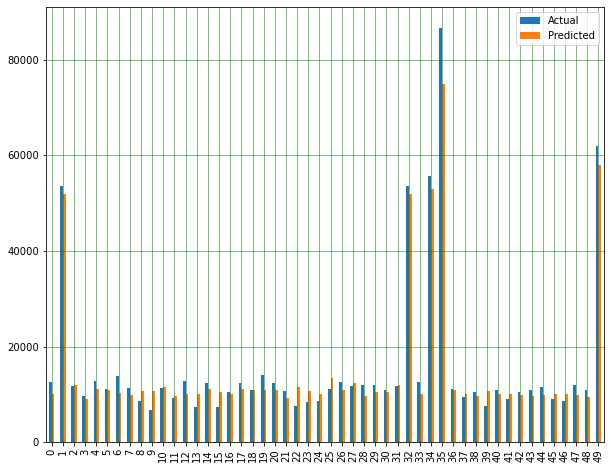

In [53]:
# Comparing the Actual and Predicted values using plot
Comparison[:50].plot(kind = 'bar', figsize = (10, 8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

In [54]:
#Creating Function to calculate score of the model. For understandable formula, googling would be usefull
def r2_score(actual, predicted):
    return 1 - (np.sum((model.predict(features.transform(data.values[:, 0:2])) - data.values[:, 2])**2)/
                np.sum((data.values[:, 2] - np.mean(data.values[:, 2]))**2))
#Calling Function and Printing the Score of the Polynomial Regression Model
r2_score(data.values[:, 2], model.predict(features.transform(data.values[:, 0:2])))

0.9217673939579433